In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix, accuracy_score,classification_report

In [2]:
read_csv=pd.read_csv('C:/Users/tomscat/Desktop/DATA7903/Final_proposal/dataset_space_API_past_launches_raw.csv')
read_csv.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [3]:
#Data wrangling
falcon9_data = read_csv[read_csv['BoosterVersion'] == 'Falcon 9']
mean_value=round(falcon9_data['PayloadMass'].mean(),2)
falcon9_data_new= falcon9_data.loc[:,'PayloadMass'].fillna(mean_value,inplace=True)
falcon9_data

C:\Users\tomscat\AppData\Local\Temp\ipykernel_19660\1721613003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon9_data_new= falcon9_data.loc[:,'PayloadMass'].fillna(mean_value,inplace=True)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,6123.55,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.00,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.00,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.00,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.00,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,103,2020-10-06,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1058,-80.603956,28.608058
91,104,2020-10-18,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,105,2020-10-24,Falcon 9,15600.00,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [4]:
falcon9_data['Outcome'].astype(str)
landing_status=[]
for row in falcon9_data['Outcome']:
        if row in ("True Ocean", "True RTLS","True ASDS"):landing_status.append("1")
        elif row in ('False Ocean','False RTLS','False ASDS','None ASDS','None None'):landing_status.append("0")
        else: landing_status.append("2")
falcon9_data['LandingStatus'] = landing_status
falcon9_data['LandingStatus'].astype('float64')
falcon9_data

C:\Users\tomscat\AppData\Local\Temp\ipykernel_19660\1297532728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  falcon9_data['LandingStatus'] = landing_status


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,LandingStatus
4,6,2010-06-04,Falcon 9,6123.55,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
5,8,2012-05-22,Falcon 9,525.00,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
6,10,2013-03-01,Falcon 9,677.00,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
7,11,2013-09-29,Falcon 9,500.00,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
8,12,2013-12-03,Falcon 9,3170.00,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,2020-09-03,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
90,103,2020-10-06,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1058,-80.603956,28.608058,1
91,104,2020-10-18,Falcon 9,15600.00,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
92,105,2020-10-24,Falcon 9,15600.00,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


In [5]:
#Choose the data features we need for prediction
feature_data = falcon9_data[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
feature_data.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
4,6,6123.55,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
5,8,525.00,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
6,10,677.00,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
7,11,500.00,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
8,12,3170.00,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [6]:
#Covert data to columns
feature_data=pd.get_dummies(feature_data, prefix=['Orbits','LaunchSite','LandingPad','Serial'])
feature_data.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbits_ES-L1,Orbits_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,6,6123.55,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,525.00,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,10,677.00,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,500.00,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,12,3170.00,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Transfer into boolean
feature_data.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbits_ES-L1,Orbits_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,6.0,6123.55,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8.0,525.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10.0,677.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,11.0,500.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,12.0,3170.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102.0,15600.00,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
90,103.0,15600.00,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
91,104.0,15600.00,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,105.0,15600.00,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
X=feature_data
X

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbits_ES-L1,Orbits_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,6,6123.55,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,525.00,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,10,677.00,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,500.00,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,12,3170.00,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,102,15600.00,2,True,True,True,5.0,12,0,0,...,0,0,0,0,0,0,0,0,1,0
90,103,15600.00,3,True,True,True,5.0,12,0,0,...,0,0,0,0,0,0,1,0,0,0
91,104,15600.00,6,True,True,True,5.0,12,0,0,...,0,0,0,1,0,0,0,0,0,0
92,105,15600.00,3,True,True,True,5.0,12,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
Y=falcon9_data['LandingStatus'].to_numpy()
Y

array(['0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1',
       '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0',
       '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1'],
      dtype=object)

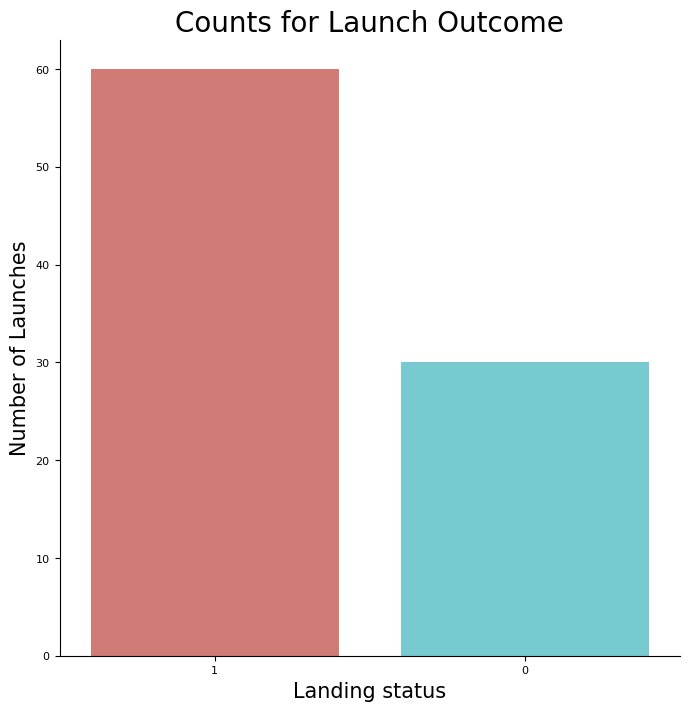

In [10]:
y_predict=pd.Series(Y)
df=y_predict.value_counts()
plt.figure(figsize=(8,8))
ax=sns.barplot(x=df.index, y=df.values, palette='hls', alpha=0.9)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.title('Counts for Launch Outcome', fontsize=20)
plt.ylabel('Number of Launches',fontsize=15)
plt.xlabel('Landing status',fontsize=15)
plt.show()

In [11]:
transform = preprocessing.StandardScaler()
X=transform.fit_transform(X)
X

array([[-1.73641465e+00,  4.72235270e-07, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.66761548e+00, -1.18972428e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.59881631e+00, -1.15742338e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63474476e+00,  2.01380174e+00,  3.49060516e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.66914435e+00,  2.01380174e+00,  1.00389436e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.70354393e+00, -5.19055745e-01, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)
parameters ={
             'class_weight':['balanced', None],
              'C':[0.0001, 1, 100, 1000],
              'max_iter':[1, 10, 100, 500],
              'n_jobs':[5],
             'fit_intercept':[True]
             } 
lr=LogisticRegression(random_state=1)

In [13]:
lr_cv=GridSearchCV(lr,parameters, cv=10)
lr_cv.fit(X_train,Y_train)
print("hyperparameters ",lr_cv.best_params_)
print("Cross-validation accuracy :",lr_cv.best_score_)
print('test data accuracy:',lr_cv.score(X_test, Y_test))

hyperparameters  {'C': 1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'n_jobs': 5}
Cross-validation accuracy : 0.8214285714285714
test data accuracy: 0.8333333333333334


In [14]:
predict_result = lr_cv.predict_proba(X_test)[:,1]
auc_curve=roc_auc_score(Y_test, predict_result) 
print("Test set AUC:",format(auc_curve))

Test set AUC: 0.9166666666666667


In [15]:
# Compute confusion matrix
y_predict = lr_cv.predict(X_test)
y_predict=y_predict.astype(int)
Y_test=Y_test.astype(int)

In [16]:
lr_f1 = f1_score(Y_test, y_predict) 
lr_prec = precision_score(Y_test,y_predict)
lr_rec = recall_score(Y_test, y_predict) 
lr_acc = accuracy_score(Y_test, y_predict) 
lr_matrix = confusion_matrix(Y_test, y_predict, labels=[0,1])
#np.set_printoptions(precision=2)
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

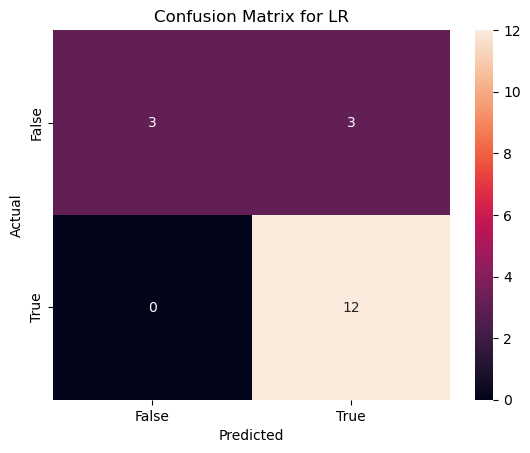

In [18]:
# Plot non-normalized confusion matrix
plot= plt.subplot()
sns.heatmap(lr_matrix,annot=True,ax = plot)
plot.set_title('Confusion Matrix for LR');
plot.set_xlabel('Predicted')
plot.set_ylabel('Actual')
plot.xaxis.set_ticklabels(['False', 'True'])
plot.yaxis.set_ticklabels(['False', 'True'])

In [19]:
###SVM Prediction
parameters = {'kernel':['linear','rbf','sigmoid','poly'],'C':np.linspace(0.1,20,50),'gamma':np.linspace(0.1,20,20)}
svm = SVC(probability=True,random_state=1)
svm_cv = GridSearchCV(svm, parameters, cv = 10,scoring='accuracy')
svm_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("Crosss-validation accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Crosss-validation accuracy : 0.8625


In [20]:
Y_test=Y_test.astype(str)
svm_acc=svm_cv.score(X_test, Y_test)
print("Test set accuracy",svm_acc)
svm_probs = svm_cv.predict_proba(X_test)[:,1]
svm_auc=roc_auc_score(Y_test, svm_probs) 
print("Test set AUC",svm_auc)

Test set accuracy 0.8333333333333334
Test set AUC 0.9166666666666667


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

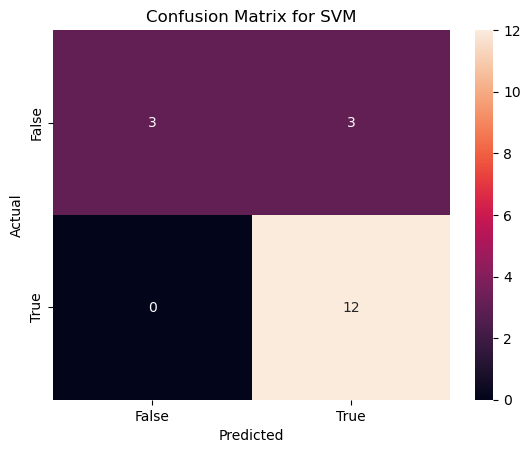

In [22]:
svm_prediction = svm_cv.predict(X_test)
svm_prediction=svm_prediction.astype(int)
Y_test=Y_test.astype(int)
svm_f1 = f1_score(Y_test, svm_prediction) 
svm_prec = precision_score(Y_test, svm_prediction)
svm_rec = recall_score(Y_test, svm_prediction) 
svm_acc = accuracy_score(Y_test, svm_prediction) 
cnf_matrix = confusion_matrix(Y_test, svm_prediction, labels=[0,1])
np.set_printoptions(precision=2)
print(classification_report(Y_test, svm_prediction))
plot= plt.subplot()
sns.heatmap(cnf_matrix,annot=True,ax = plot)
plot.set_title('Confusion Matrix for SVM');
plot.set_xlabel('Predicted')
plot.set_ylabel('Actual')
plot.xaxis.set_ticklabels(['False', 'True'])
plot.yaxis.set_ticklabels(['False', 'True'])

In [23]:
#Decision tree
parameters = {'criterion': ['gini', 'entropy'],
     'max_depth': [1*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
    'splitter': ['best', 'random'],
     'min_samples_leaf': [1,3,5],
     'min_samples_split': [1,2,3]}
d_tree= DecisionTreeClassifier(random_state=1)

In [24]:
tree = GridSearchCV(d_tree, parameters, cv=10)
tree.fit(X_train, Y_train)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.war

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']})

In [25]:
print("Best hyperparameters:",tree.best_params_)
print("Cross-validation Accuracy:",tree.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
Cross-validation Accuracy: 0.8732142857142856


In [26]:
Y_test=Y_test.astype(str)
tree_acc=tree.score(X_test, Y_test)
print("Test set accuracy:",tree_acc)
tree_probs = tree.predict_proba(X_test)[:,1]
tree_auc=roc_auc_score(Y_test, tree_probs) 
print("Test set AUC:",tree_auc)

Test set accuracy: 0.8888888888888888
Test set AUC: 0.9444444444444444


In [27]:
tree_predict = tree.predict(X_test)
tree_predict=tree_predict.astype(int)
Y_test=Y_test.astype(int)
tree_f1 = f1_score(Y_test, tree_predict) 
tree_prec = precision_score(Y_test, tree_predict)
tree_rec = recall_score(Y_test, tree_predict) 
cnf_matrix = confusion_matrix(Y_test, tree_predict, labels=[0,1])
np.set_printoptions(precision=2)
print(classification_report(Y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.92      0.92      0.92        12

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



[Text(0, 0.5, 'Fail'), Text(0, 1.5, 'Succeed')]

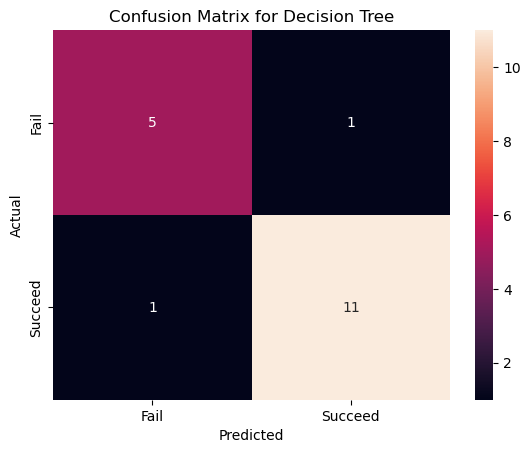

In [28]:
plot= plt.subplot()
sns.heatmap(cnf_matrix,annot=True,ax = plot)
plot.set_title('Confusion Matrix for Decision Tree');
plot.set_xlabel('Predicted')
plot.set_ylabel('Actual')
plot.xaxis.set_ticklabels(['Fail', 'Succeed'])
plot.yaxis.set_ticklabels(['Fail', 'Succeed'])

In [29]:
model_score = {'Accuracy': [lr_acc, svm_acc, tree_acc],
               'Recall': [lr_rec, svm_rec, tree_rec],
               'Precision': [lr_prec, svm_prec, tree_prec], 
               'F1-Score': [lr_f1, svm_f1, tree_f1]
        }
table = pd.DataFrame(model_score, index=['Logistic Regression', 'SVM', 'Decision Tree']).sort_values(by=['Accuracy'], ascending=False)
table.round(4)

,Accuracy,Recall,Precision,F1-Score
Decision Tree,0.8889,0.9167,0.9167,0.9167
Logistic Regression,0.8333,1.0000,0.8000,0.8889
SVM,0.8333,1.0000,0.8000,0.8889
